## Data Mining - Assignment 2
#### Natalie Kim

In [1]:
# Import libraries
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

np.set_printoptions(precision=3)

In [110]:
# Read CSV File
ames_data = pd.read_csv(r'/Users/xnxk040/Library/CloudStorage/OneDrive-W.WGrainger,inc/Desktop/data mining data/AmesHousing.csv')

In [89]:
# As data frame
ames_data_array=ames_data.values
ames_data_frame = pd.DataFrame(ames_data_array[:,1:9],index = ames_data_array[:,0])

In [90]:
# Summmary of data
ames_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
ames_data.info()

In [ ]:
ames_data.nunique()

In [ ]:
ames_data.isnull().sum()

#### Data Reduction

##### Find Numerical Data Subset

In [103]:
num_data = ames_data.select_dtypes(include=np.number).columns.tolist()
print("Numerical Variables:")
print(num_data)

Numerical Variables:
['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


In [104]:
num_data = ames_data[num_data]

In [105]:
# Find Unique Values of All Numeric Data
num_data.nunique()

Order              2930
PID                2930
MS SubClass          16
Lot Frontage        128
Lot Area           1960
Overall Qual         10
Overall Cond          9
Year Built          118
Year Remod/Add       61
Mas Vnr Area        445
BsmtFin SF 1        995
BsmtFin SF 2        274
Bsmt Unf SF        1137
Total Bsmt SF      1058
1st Flr SF         1083
2nd Flr SF          635
Low Qual Fin SF      36
Gr Liv Area        1292
Bsmt Full Bath        4
Bsmt Half Bath        3
Full Bath             5
Half Bath             3
Bedroom AbvGr         8
Kitchen AbvGr         4
TotRms AbvGrd        14
Fireplaces            5
Garage Yr Blt       103
Garage Cars           6
Garage Area         603
Wood Deck SF        380
Open Porch SF       252
Enclosed Porch      183
3Ssn Porch           31
Screen Porch        121
Pool Area            14
Misc Val             38
Mo Sold              12
Yr Sold               5
SalePrice          1032
dtype: int64

In [108]:
# Removing numerical categorical predictors
num_data = num_data[['Lot Frontage', 'Lot Area', 'Overall Qual','Year Built', 
                      'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 
                      'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 
                      'Gr Liv Area', 'Garage Yr Blt', 'Garage Area', 'Wood Deck SF', 
                      'Open Porch SF', 'Enclosed Porch', 'Screen Porch', 'Pool Area', 
                      'Misc Val', 'SalePrice']]

Correlation of Variables to SalePrice

In [109]:
correlation_matrix = num_data.corr()


1. Numeric variables that are appropriate
    - Lot Area
    - Mas Vnr Area
    - BsmtFin SF 1
    - BsmtFin SF 2
    - Bsmt Unf SF
    - Total Bsmt SF
    - 1st Flr SF
    - 2nd Flr SF
    - Low Qual Fin SF
    - Gr Liv Area
    - Garage Area
    - Wood Deck SF
    - Open Porch SF

In [72]:
numeric_subset = data[['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 
                      'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
                      '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 
                      'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
                      'Open Porch SF', 'SalePrice']]
numeric_subset = numeric_subset.fillna(0)

#### Scaling Data

In [73]:
# 2. Scaling data
numeric_subset = scale(numeric_subset)

#### K-means Solution

In [74]:
# Fix number of clusters
k=10

Had to install numpy version 1.21.6 and restart kernel for kmeans to work. numpy version 1.24.4 didn't work kmeans function

In [75]:
# 3. Kmeans Clustering
x = KMeans(n_clusters=k, n_init=100, max_iter=200, tol=0.0001, 
           verbose=0,random_state = 13511).fit(numeric_subset)
x.fit_predict(numeric_subset)

centroids = x.cluster_centers_
labels = x.labels_

##### R-Squared

In [76]:
shap = (len(numeric_subset),k)
cluster_matrix = np.zeros(shap)

for i in range(k):     
    cluster_matrix[x.labels_ == i,i]=1.0

predicted_data= np.dot(cluster_matrix,centroids_matrix)
shap2 = (len(numeric_subset)*3,1)

print ("\nThe R-Square for", k, "clusters is", (np.corrcoef(predicted_data.ravel(), numeric_subset.ravel())[0,1])**2)

ValueError: shapes (2930,10) and (3,18) not aligned: 10 (dim 1) != 3 (dim 0)

#### Scree Tests

/Users/xnxk040/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xnxk040/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xnxk040/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xnxk040/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init

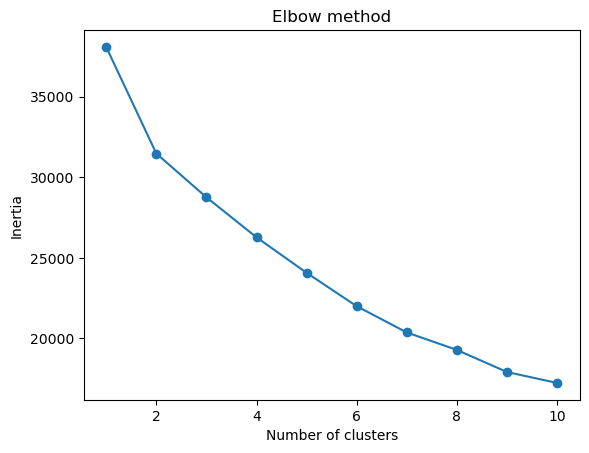

In [77]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(numeric_subset)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [62]:
x1 = KMeans(n_clusters=3, n_init=100, max_iter=200, tol=0.0001, 
           verbose=0,random_state = 13511).fit(numeric_subset)
x1.fit_predict(numeric_subset)

centroids = x1.cluster_centers_
labels = x1.labels_

In [63]:
print('\nCenters for the clusters are: ') 
print(centroids.T)
print('\nCluster Indicators for each data row are:') 
print(labels)


Centers for the clusters are: 
[[-1.574e-01 -4.596e-02  7.169e-01]
 [-6.687e-01  7.130e-01  7.513e-01]
 [-6.231e-01  6.738e-01  6.761e-01]
 [-2.968e-01 -2.312e-02  1.191e+00]
 [-1.814e-01 -2.452e-01  1.312e+00]
 [ 9.634e-02 -1.992e-01  1.354e-01]
 [-2.997e-01  4.360e-01  4.262e-02]
 [-4.492e-01  1.049e-01  1.450e+00]
 [-4.198e-01  3.273e-02  1.520e+00]
 [-2.657e-01  3.836e-01  4.517e-02]
 [ 3.825e-02 -3.846e-02 -4.883e-02]
 [-5.471e-01  3.469e-01  1.212e+00]
 [-5.155e-01  3.276e-01  1.140e+00]
 [-2.370e-01  5.770e-02  7.587e-01]
 [-3.593e-01  3.141e-01  5.780e-01]
 [ 2.144e-01 -2.635e-01 -1.528e-01]
 [ 8.416e-04 -1.326e-01  3.317e-01]
 [-6.334e-01  2.688e-01  1.739e+00]]

Cluster Indicators for each data row are:
[1 0 0 ... 0 0 1]


In [64]:
centroids_dataframe = pd.DataFrame(data=centroids)
centroids_matrix = centroids_dataframe.values
#centroids_matrix = centroids_matrix.transpose()
print(centroids_matrix)
print("\nThe cluster sizes are", np.bincount(labels))
print("\nThe cluster proportions are", np.bincount(labels)/len(labels))

[[-1.574e-01 -6.687e-01 -6.231e-01 -2.968e-01 -1.814e-01  9.634e-02
  -2.997e-01 -4.492e-01 -4.198e-01 -2.657e-01  3.825e-02 -5.471e-01
  -5.155e-01 -2.370e-01 -3.593e-01  2.144e-01  8.416e-04 -6.334e-01]
 [-4.596e-02  7.130e-01  6.738e-01 -2.312e-02 -2.452e-01 -1.992e-01
   4.360e-01  1.049e-01  3.273e-02  3.836e-01 -3.846e-02  3.469e-01
   3.276e-01  5.770e-02  3.141e-01 -2.635e-01 -1.326e-01  2.688e-01]
 [ 7.169e-01  7.513e-01  6.761e-01  1.191e+00  1.312e+00  1.354e-01
   4.262e-02  1.450e+00  1.520e+00  4.517e-02 -4.883e-02  1.212e+00
   1.140e+00  7.587e-01  5.780e-01 -1.528e-01  3.317e-01  1.739e+00]]

The cluster sizes are [1523 1008  399]

The cluster proportions are [0.52  0.344 0.136]


##### VAF Criteria

##### Segment Interpretability

##### Test

## Gaussian Mixture Model

In [15]:
from sklearn.mixture import GaussianMixture

In [46]:
mymixture = GaussianMixture(n_components=5,n_init=50,random_state=13511)
mixresults=mymixture.fit(numeric_subset)
print(mixresults.means_)


[[-0.14  -1.05  -0.44  -0.566 -0.414 -0.294 -0.108 -0.649 -0.434  0.061
  -0.101 -0.294 -0.563 -0.269 -0.231  0.586 -0.285 -0.597]
 [ 0.954 -0.06  -0.132  0.766  0.214  0.563 -0.288  0.15   0.462  0.594
  -0.101  0.852  0.356  0.275  0.531  0.708  0.741  0.418]
 [-0.137 -0.951 -0.39  -0.566 -0.408  0.52  -0.28  -0.501 -0.547  0.451
   1.94   0.136 -0.339 -0.245 -0.22   0.346  0.805 -0.416]
 [-0.079  0.646  0.33   0.199  0.134 -0.294  0.264  0.289  0.095  0.036
  -0.101  0.095  0.266  0.104  0.095 -0.359 -0.285  0.302]
 [ 0.008  0.005 -0.15   0.07   0.307  1.08  -0.477  0.256  0.385 -0.783
  -0.101 -0.375 -0.008  0.046 -0.161 -0.359  0.816 -0.083]]


Based on GM means... 

In [57]:
means_df = pd.DataFrame(mymixture.means_)

In [58]:
means_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.140094,-1.050031,-0.440458,-0.566039,-0.414479,-0.293918,-0.108122,-0.648729,-0.433916,0.061194,-0.101005,-0.293783,-0.563321,-0.268979,-0.230569,0.586137,-0.285354,-0.597314
1,0.953871,-0.060281,-0.131675,0.766314,0.214146,0.562719,-0.287885,0.150134,0.461808,0.594325,-0.101005,0.852422,0.355898,0.274929,0.530590,0.707620,0.741361,0.417527
2,-0.136913,-0.951015,-0.390323,-0.566039,-0.408034,0.519754,-0.279517,-0.500810,-0.546763,0.450661,1.939956,0.135764,-0.338587,-0.244752,-0.219548,0.346175,0.804783,-0.415969
3,-0.078503,0.646211,0.330135,0.199206,0.134180,-0.293918,0.264138,0.289173,0.094863,0.036332,-0.101005,0.095078,0.266015,0.103823,0.094808,-0.358838,-0.285354,0.301532
4,0.008048,0.004769,-0.150455,0.070499,0.306991,1.079876,-0.477346,0.255575,0.384675,-0.783185,-0.101005,-0.374751,-0.008061,0.046441,-0.160633,-0.358838,0.815890,-0.083208


In [61]:
centroids_df = pd.DataFrame(centroids)
centroids_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.309465,0.747882,0.675613,0.546883,0.433914,-0.046560,0.405524,0.834651,0.829436,0.209612,-0.050896,0.815986,0.785400,0.431020,0.499862,-0.219324,0.066532,0.987958
1,-0.164024,-0.396397,-0.358093,-0.289862,-0.229986,0.024678,-0.214939,-0.442387,-0.439623,-0.111100,0.026976,-0.432494,-0.416282,-0.228452,-0.264940,0.116247,-0.035264,-0.523644


Danae's Code

In [49]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

##np.set_printoptions(precision=3)

In [2]:
ames = pd.read_csv(r'/Users/danae.vassiliadis/Downloads/AmesHousing.csv')

In [4]:
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
ames.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [12]:
#using all the numeric vars as the data set
ames_num = ames.select_dtypes(include='number')

In [13]:
ames_num.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900


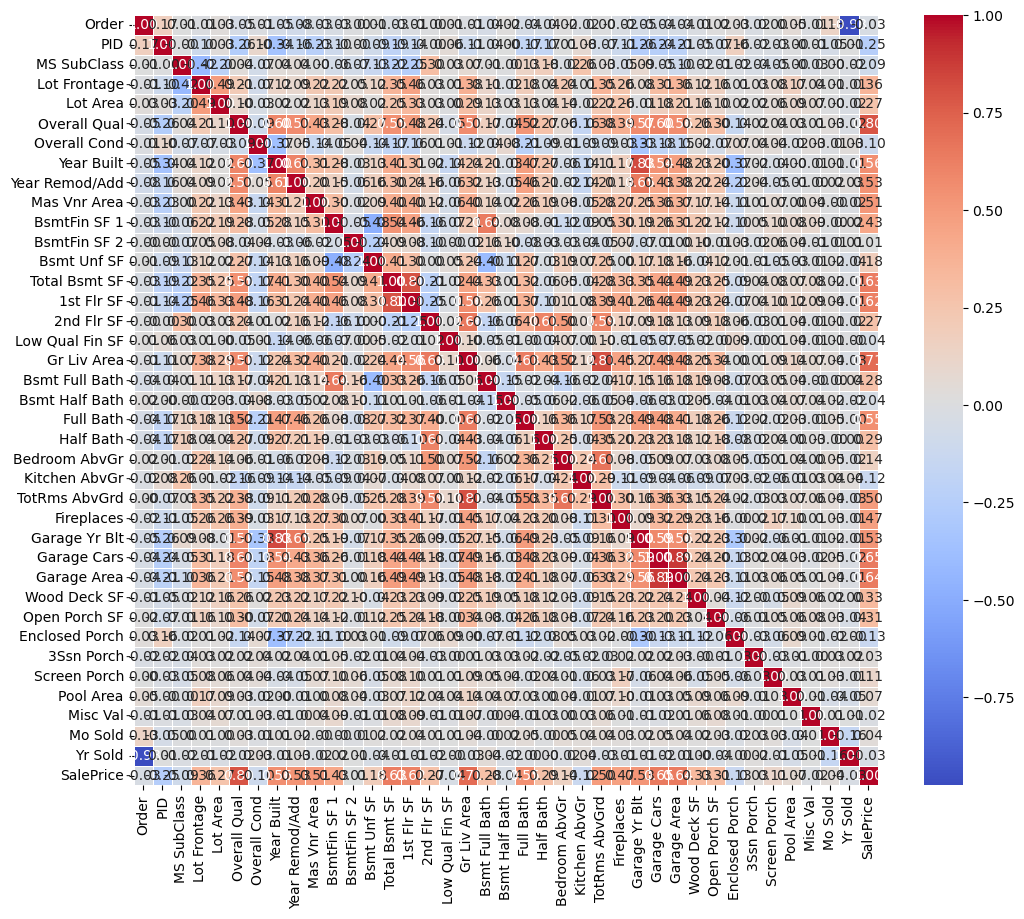

In [28]:
correlation_matrix = ames_num.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

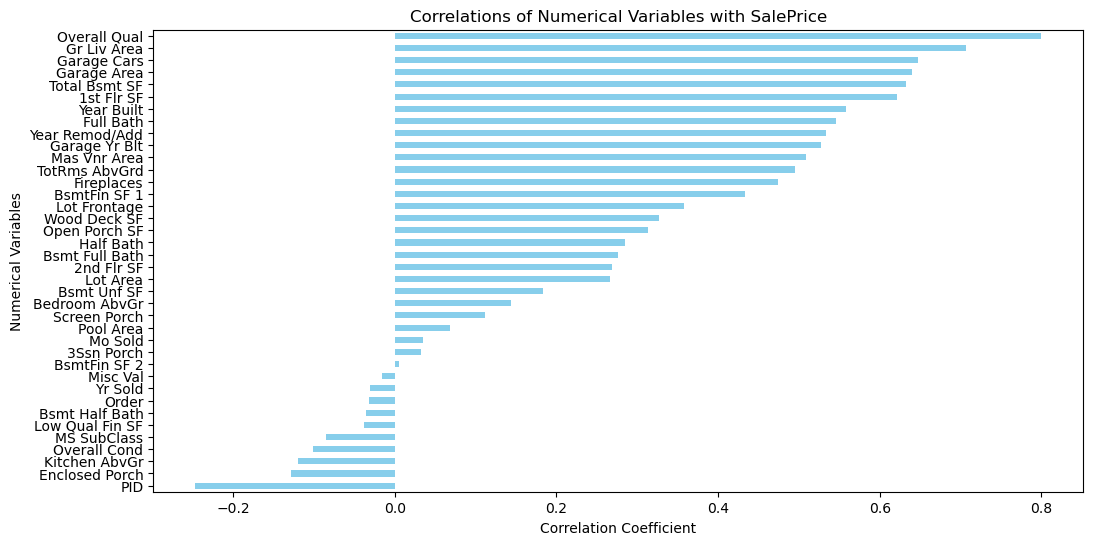

In [29]:
# Select numeric variables (excluding 'SalePrice')
numeric_features = ames_num.select_dtypes(include='number').drop('SalePrice', axis=1)

# Calculate correlations with SalePrice
correlations_with_saleprice = numeric_features.corrwith(ames_num['SalePrice'])

# Create a bar plot
plt.figure(figsize=(12, 6))
correlations_with_saleprice.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlations of Numerical Variables with SalePrice')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numerical Variables')
plt.show()

In [35]:
umeric_features = ames_num.select_dtypes(include='number').drop('SalePrice', axis=1)

# Calculate correlations with SalePrice
correlations_with_saleprice = numeric_features.corrwith(ames_num['SalePrice'])

# Select the top 12 features with the highest correlation coefficients
top_features = correlations_with_saleprice.abs().nlargest(12).index

print(top_features)

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd'],
      dtype='object')


In [43]:
#data preprocessing 

ames_num.head()

ames_num_select = ames_num[['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd', 'SalePrice']]

ames_num_select.head()
#because kmeans cant handle nan values
ames_num_clean = ames_num_select.dropna()

In [44]:
#split into train 70% and test 30% 
train_data, test_data = train_test_split(ames_num_clean, test_size=0.3, random_state=42)

#standard scaling standardizing 
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data.drop("SalePrice", axis=1))
scaled_test_data = scaler.transform(test_data.drop("SalePrice", axis=1))

In [51]:

np.random.seed(123)

#range
k_values = range(2, 10)

vaf_values = []
cluster_sizes = []
cluster_centroids = []

for k in k_values:
    # Fit K-means model
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=123)
    kmeans.fit(scaled_train_data)
    
    # Get cluster assignments and centroids
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    # Calculate R-squared (VAF)
    vaf = r2_score(scaled_train_data, centroids[clusters])
    
    # Append results to lists
    vaf_values.append(vaf)
    cluster_sizes.append(np.bincount(clusters))
    cluster_centroids.append(centroids)

results_df = pd.DataFrame({
    'K': k_values,
    'VAF': vaf_values,
    'Cluster_Sizes': cluster_sizes,
    'Cluster_Centroids': cluster_centroids
})

print(results_df)

   K       VAF                                Cluster_Sizes  \
0  2  0.336824                                   [944, 979]   
1  3  0.437692                              [293, 750, 880]   
2  4  0.492093                         [594, 751, 275, 303]   
3  5  0.533210                    [272, 522, 243, 535, 351]   
4  6  0.559105               [283, 519, 346, 305, 225, 245]   
5  7  0.580460           [226, 344, 218, 44, 275, 517, 299]   
6  8  0.601029      [300, 46, 383, 208, 327, 171, 216, 272]   
7  9  0.616216  [123, 325, 146, 274, 2, 170, 208, 381, 294]   

                                   Cluster_Centroids  
0  [[0.6815342137979089, 0.5756869258732447, 0.64...  
1  [[1.3698676581510807, 1.3069497212936025, 1.44...  
2  [[0.4187698678683561, 0.019163166063832747, 0....  
3  [[1.4607643942375341, 1.2732640126538137, 1.51...  
4  [[0.6449479783790195, -0.08695617594474452, 0....  
5  [[-0.2712650208486396, 0.8686035706828935, 0.0...  
6  [[0.35387949322965606, 0.3543717284954169, 0

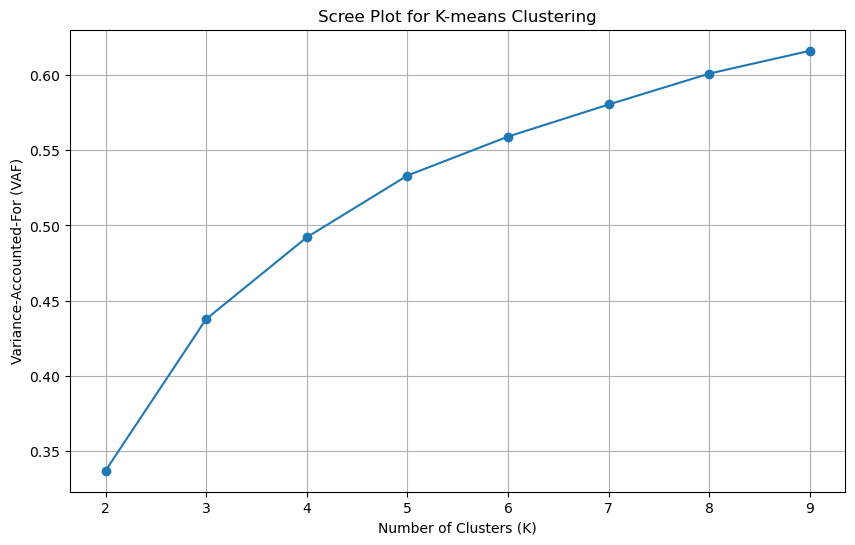

In [52]:
#scree plot
plt.figure(figsize=(10, 6))
plt.plot(results_df['K'], results_df['VAF'], marker='o', linestyle='-')
plt.title('Scree Plot for K-means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Variance-Accounted-For (VAF)')
plt.grid(True)
plt.show()

In [54]:
#testing k=3 on testing data (step 6) 

train_vaf_values = []
train_cluster_sizes = []
train_cluster_centroids = []

test_vaf_values = []
test_cluster_sizes = []
test_cluster_centroids = []

# K-means on the training set with k= 3
kmeans_train = KMeans(n_clusters= 3, n_init=100, random_state=123)
kmeans_train.fit(scaled_train_data)


train_clusters = kmeans_train.labels_
train_centroids = kmeans_train.cluster_centers_

# Calculate R-squared (VAF) for training set
train_vaf = r2_score(scaled_train_data, train_centroids[train_clusters])


train_vaf_values.append(train_vaf)
train_cluster_sizes.append(np.bincount(train_clusters))
train_cluster_centroids.append(train_centroids)

# run kmeans on test set 
kmeans_test = KMeans(n_clusters=3, init=train_centroids, n_init=1, random_state=123)
kmeans_test.fit(scaled_test_data)


test_clusters = kmeans_test.labels_
test_centroids = kmeans_test.cluster_centers_

# rsquared for test set 
test_vaf = r2_score(scaled_test_data, test_centroids[test_clusters])


test_vaf_values.append(test_vaf)
test_cluster_sizes.append(np.bincount(test_clusters))
test_cluster_centroids.append(test_centroids)


train_results_df = pd.DataFrame({
    'VAF': train_vaf_values,
    'Cluster_Sizes': train_cluster_sizes,
    'Cluster_Centroids': train_cluster_centroids
})

test_results_df = pd.DataFrame({
    'VAF': test_vaf_values,
    'Cluster_Sizes': test_cluster_sizes,
    'Cluster_Centroids': test_cluster_centroids
})

# Display the results DataFrames for training and test sets
print("Training Set Results:")
print(train_results_df)

print("\nTest Set Results:")
print(test_results_df)

Training Set Results:
        VAF    Cluster_Sizes  \
0  0.437692  [293, 750, 880]   

                                   Cluster_Centroids  
0  [[1.369867658151081, 1.3069497212936025, 1.447...  

Test Set Results:
        VAF    Cluster_Sizes  \
0  0.454642  [138, 323, 364]   

                                   Cluster_Centroids  
0  [[1.363938947630857, 1.2107476330424223, 1.506...  


ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

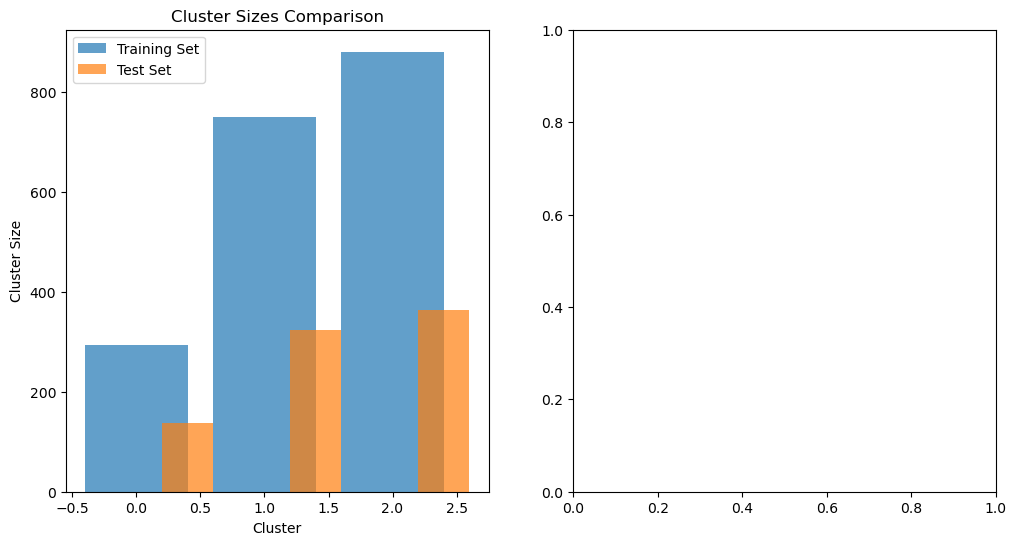

In [57]:
# Visualize Cluster Sizes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Training Set Cluster Sizes
plt.bar(range(3), train_cluster_sizes[0], label='Training Set', alpha=0.7)

# Test Set Cluster Sizes
plt.bar(np.arange(3) + 0.4, test_cluster_sizes[0], width=0.4, label='Test Set', alpha=0.7)

plt.xlabel('Cluster')
plt.ylabel('Cluster Size')
plt.title('Cluster Sizes Comparison')
plt.legend()

# Visualize Cluster Centroids
plt.subplot(1, 2, 2)

# Training Set Cluster Centroids
for i in range(3):
    plt.plot(range(len(train_centroids[0])), train_centroids[0][i], label=f'Training Set - Cluster {i}')

# Test Set Cluster Centroids
for i in range(3):
    plt.plot(range(len(test_centroids[0])), test_centroids[0][i], label=f'Test Set - Cluster {i}', linestyle='--')

plt.xlabel('Feature Index')
plt.ylabel('Centroid Value')
plt.title('Cluster Centroids Comparison')
plt.legend()

plt.tight_layout()
plt.show()

In [50]:
#step 7 

#range
components_range = range(3, 6)  # Adjust as needed


lowest_aic = np.inf
best_gm = None

for n_components in components_range:
    # Fit Gaussian Mixture model
    gm = GaussianMixture(n_components=n_components, n_init=100, random_state=123)
    gm.fit(scaled_train_data)
    
    # Calculate AIC
    aic = gm.aic(scaled_train_data)
    
    # Update lowest AIC and best model
    if aic < lowest_aic:
        lowest_aic = aic
        best_gm = gm

# Display the best Gaussian Mixture model
print("Best Gaussian Mixture Model:")
print(best_gm)
print("Number of Components:", best_gm.n_components)
print("AIC:", lowest_aic)

Best Gaussian Mixture Model:
GaussianMixture(n_components=5, n_init=100, random_state=123)
Number of Components: 5
AIC: -2749.786373338806
